# Exoplanet Classification and Finding out why a planet might be classified as 'false candidate'

### About the Project
#### We are trying to classify the status of the Kepler Object - A kepler object is a stellar body that is likely to be a planet.
#### This information comes from NASA's Kepler telescope and is maintained here https://exoplanetarchive.ipac.caltech.edu/index.html.
#### Citations are in-place following the APA 7th edition guidelines, for the work done by others.
#### In the previous works, there were classifications of the objects - whether the object is a planet or not. In this project, apart from improving the other's work, we also try to figure out what are the 'flags' for the object to be classified as a 'false-positive'. We strongly hope that this work reduces the long hours of observing the objects since false-positives can be ruled out or given the least priority.
#### The dataset was obtained directly from the above mentioned link.
### Column Explanations for the dataset are as follows:
##### COLUMN kepid:          KepID
##### COLUMN kepoi_name:     KOI Name
##### COLUMN kepler_name:    Kepler Name
##### COLUMN koi_disposition: Exoplanet Archive Disposition
##### COLUMN koi_pdisposition: Disposition Using Kepler Data
##### COLUMN koi_score:      Disposition Score
##### COLUMN koi_fpflag_nt:  Not Transit-Like False Positive Flag
##### COLUMN koi_fpflag_ss:  Stellar Eclipse False Positive Flag
##### COLUMN koi_fpflag_co:  Centroid Offset False Positive Flag
##### COLUMN koi_fpflag_ec:  Ephemeris Match Indicates Contamination False Positive Flag
##### COLUMN koi_period:     Orbital Period [days]
##### COLUMN koi_period_err1: Orbital Period Upper Unc. [days]
##### COLUMN koi_period_err2: Orbital Period Lower Unc. [days]
##### COLUMN koi_time0bk:    Transit Epoch [BKJD]
##### COLUMN koi_time0bk_err1: Transit Epoch Upper Unc. [BKJD]
##### COLUMN koi_time0bk_err2: Transit Epoch Lower Unc. [BKJD]
##### COLUMN koi_impact:     Impact Parameter
##### COLUMN koi_impact_err1: Impact Parameter Upper Unc.
##### COLUMN koi_impact_err2: Impact Parameter Lower Unc.
##### COLUMN koi_duration:   Transit Duration [hrs]
##### COLUMN koi_duration_err1: Transit Duration Upper Unc. [hrs]
##### COLUMN koi_duration_err2: Transit Duration Lower Unc. [hrs]
##### COLUMN koi_depth:      Transit Depth [ppm]
##### COLUMN koi_depth_err1: Transit Depth Upper Unc. [ppm]
##### COLUMN koi_depth_err2: Transit Depth Lower Unc. [ppm]
##### COLUMN koi_prad:       Planetary Radius [Earth radii]
##### COLUMN koi_prad_err1:  Planetary Radius Upper Unc. [Earth radii]
##### COLUMN koi_prad_err2:  Planetary Radius Lower Unc. [Earth radii]
##### COLUMN koi_teq:        Equilibrium Temperature [K]
##### COLUMN koi_teq_err1:   Equilibrium Temperature Upper Unc. [K]
##### COLUMN koi_teq_err2:   Equilibrium Temperature Lower Unc. [K]
##### COLUMN koi_insol:      Insolation Flux [Earth flux]
##### COLUMN koi_insol_err1: Insolation Flux Upper Unc. [Earth flux]
##### COLUMN koi_insol_err2: Insolation Flux Lower Unc. [Earth flux]
##### COLUMN koi_model_snr:  Transit Signal-to-Noise
##### COLUMN koi_tce_plnt_num: TCE Planet Number
##### COLUMN koi_tce_delivname: TCE Delivery
##### COLUMN koi_steff:      Stellar Effective Temperature [K]
##### COLUMN koi_steff_err1: Stellar Effective Temperature Upper Unc. [K]
##### COLUMN koi_steff_err2: Stellar Effective Temperature Lower Unc. [K]
##### COLUMN koi_slogg:      Stellar Surface Gravity [log10(cm/s**2)]
##### COLUMN koi_slogg_err1: Stellar Surface Gravity Upper Unc. [log10(cm/s**2)]
##### COLUMN koi_slogg_err2: Stellar Surface Gravity Lower Unc. [log10(cm/s**2)]
##### COLUMN koi_srad:       Stellar Radius [Solar radii]
##### COLUMN koi_srad_err1:  Stellar Radius Upper Unc. [Solar radii]
##### COLUMN koi_srad_err2:  Stellar Radius Lower Unc. [Solar radii]
##### COLUMN ra:             RA [decimal degrees]
##### COLUMN dec:            Dec [decimal degrees]
##### COLUMN koi_kepmag:     Kepler-band [mag]

#### Run, if necessary

In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
import warnings
warnings.filterwarnings('ignore')

### Import the necessary libraries

In [2]:
#data handling
import numpy as np
import pandas as pd

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#quantifying the quality
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Read the dataset

In [3]:
df = pd.read_csv('cumulative_2021.12.01_19.11.33.csv', low_memory = False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

###### Dataset contains 9564 entries spawning over 50 columns

## Data Exploration and visualization

In [5]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [6]:
df['koi_pdisposition'].value_counts()

FALSE POSITIVE    5068
CANDIDATE         4496
Name: koi_pdisposition, dtype: int64

#### Score represents the likeliness of the planet

In [7]:
df.koi_score.value_counts().head()

0.000    3482
1.000    1777
0.999     229
0.998     143
0.997     101
Name: koi_score, dtype: int64

<AxesSubplot:ylabel='Density'>

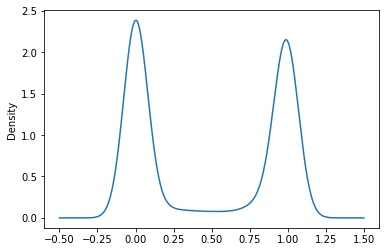

In [8]:
df.koi_score.plot.kde()

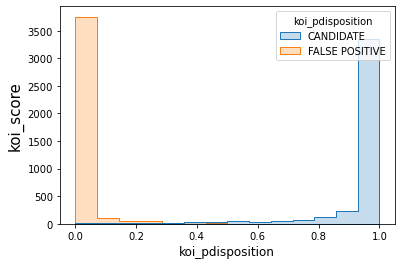

In [9]:
ax=sns.histplot(df,
x='koi_score',
hue='koi_pdisposition',
element="step",
)
ax.set_xlabel("koi_pdisposition", fontsize=12)
ax.set_ylabel('koi_score', fontsize=15)
plt.show()

### Understanding the classification of the planets

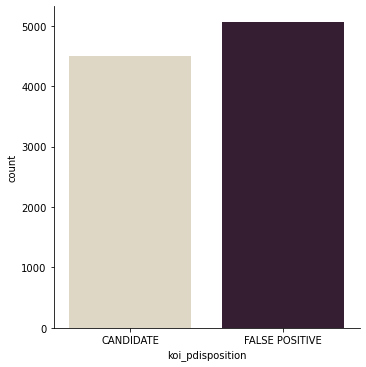

In [10]:
sns.catplot(x="koi_pdisposition", kind="count", palette="ch:0.3", data=df)

### Understanding Apparent Magnitude

Text(0.5, 0, 'Apparent magnitude')

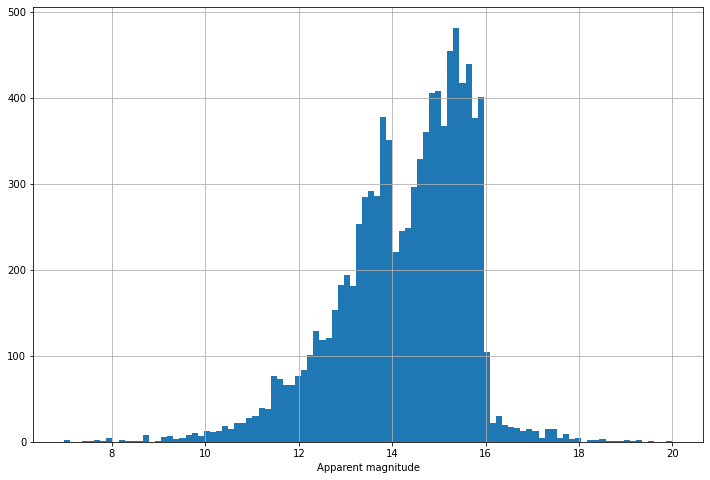

In [11]:
ax = df.koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Apparent magnitude")

###### Reference 
###### Wikimedia Foundation. (2021, December 6). Magnitude (astronomy). Wikipedia. Retrieved December 11, 2021, from https://en.wikipedia.org/wiki/Magnitude_(astronomy)#Apparent_magnitude. 

#### Inference: Most of the planets range from an apparent magnitude of 12 to 16. After 18 Apparent magnitude, very few objects exist, that could be the limitation of the kepler space telescope. (It may be unable to catch objects with lesser brightness)

### Analysis of only the confirmed planets

Text(0.5, 1.0, 'Confirmed planet')

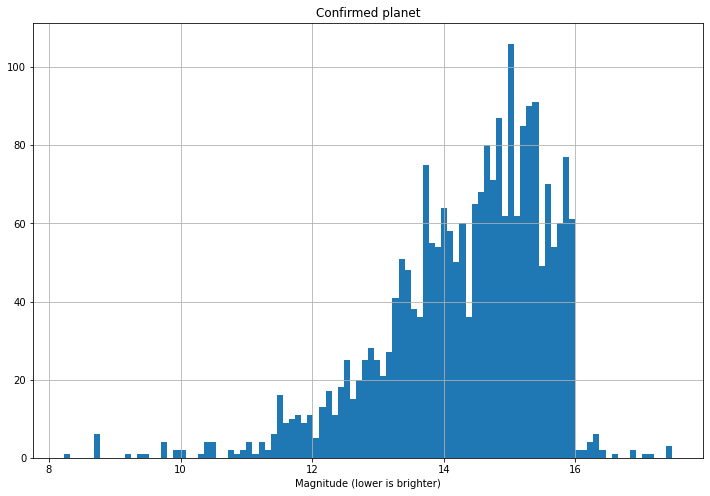

In [12]:
ax = df[df.koi_disposition == 'CONFIRMED'].koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("Confirmed planet")

### Analysis of only the false candidates

Text(0.5, 1.0, 'False Positives only')

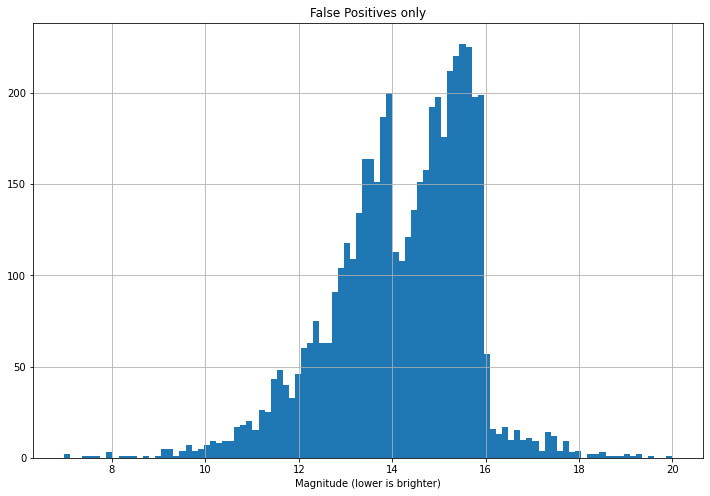

In [13]:
ax = df[df.koi_disposition == 'FALSE POSITIVE'].koi_kepmag.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Magnitude (lower is brighter)")
ax.set_title("False Positives only")

<AxesSubplot:xlabel='koi_period', ylabel='koi_score'>

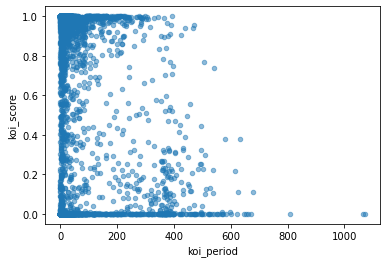

In [14]:
df.plot.scatter(x="koi_period", y="koi_score", alpha=0.5)

Text(0.5, 1.0, 'Surface gravity')

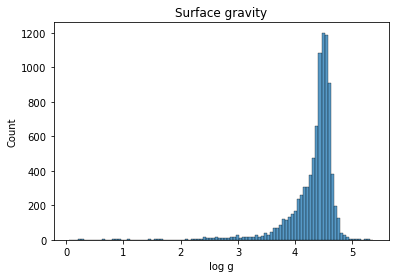

In [15]:
ax = sns.histplot(x='koi_slogg', data=df, bins=100)
ax.set_xlabel("log g")
ax.set_title("Surface gravity")

###### "The surface gravity may be thought of as the acceleration due to gravity experienced by a hypothetical test particle which is very close to the object's surface and which, in order not to disturb the system, has negligible mass." (Wikimedia Foundation. (2021, December 6). Surface gravity. Wikipedia. Retrieved December 7, 2021, from  https://en.wikipedia.org/wiki/Surface_gravity)

###### This is given in log 10 (cm/s^2). A planet containing mass similar to earth would be at around 3. So most of the objects are larger than earth

Text(0.5, 1.0, 'False Positives only')

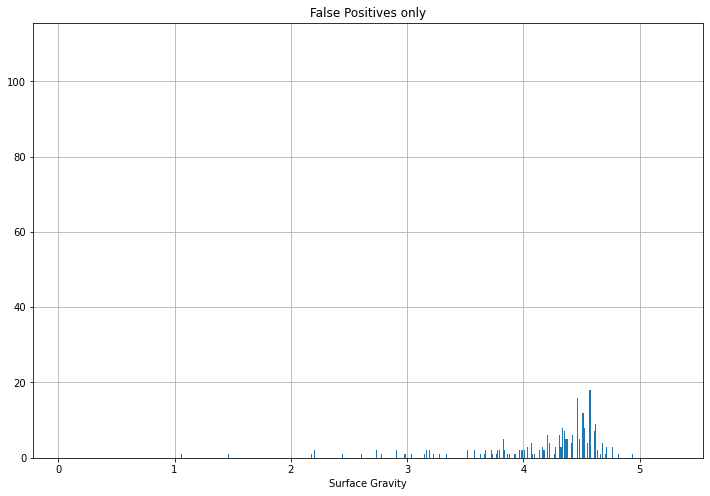

In [16]:
ax = df[df.koi_disposition == 'FALSE POSITIVE'].koi_slogg.hist(bins=10000, figsize=(12, 8))
ax.set_xlabel("Surface Gravity")
ax.set_title("False Positives only")

Text(0.5, 1.0, 'Confirmed planets only')

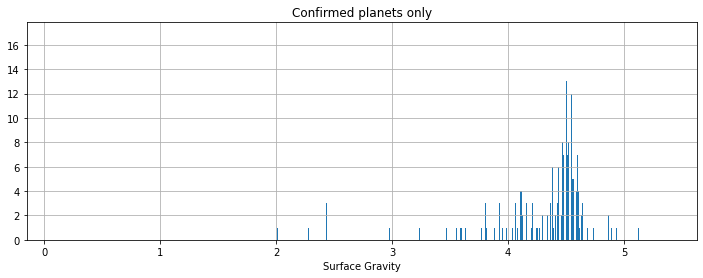

In [17]:
ax = df[df.koi_disposition == 'CANDIDATE'].koi_slogg.hist(bins=10000, figsize=(12, 4))
ax.set_xlabel("Surface Gravity")
ax.set_title("Confirmed planets only")

##### Almost all of the planets containing the surface gravity of around 1-2 turned out to be false candidates

### Surface gravity vs Planetary Radius (understanding if the planets are hollow are dense)

<AxesSubplot:xlabel='koi_prad', ylabel='koi_slogg'>

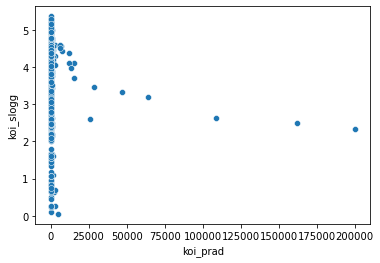

In [18]:
sns.scatterplot(x='koi_prad', y='koi_slogg', data=df, x_jitter=0.2)

### Increase the x_jitter to view the data properly

In [19]:
def rand_jitter(arr):
    stdev = .1 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def jitter(x, y, s=20, marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return sns.scatterplot(rand_jitter(x), rand_jitter(y), s=s,  marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, **kwargs)

###### Reference
###### yoavramyoavram  3, yoavram. (2014, January 22). Matplotlib: Avoiding overlapping datapoints in a "scatter/dot/beeswarm" plot. Stack Overflow. Retrieved December 9, 2021, from https://stackoverflow.com/questions/8671808/matplotlib-avoiding-overlapping-datapoints-in-a-scatter-dot-beeswarm-plot. 

<AxesSubplot:xlabel='koi_prad', ylabel='koi_slogg'>

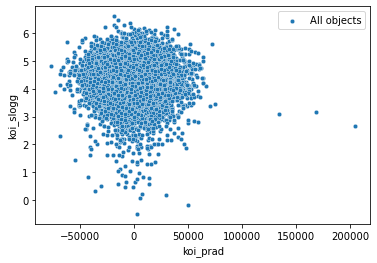

In [20]:
jitter(df['koi_prad'], df['koi_slogg'], label="All objects")

### Only the candidates

<AxesSubplot:xlabel='koi_prad', ylabel='koi_slogg'>

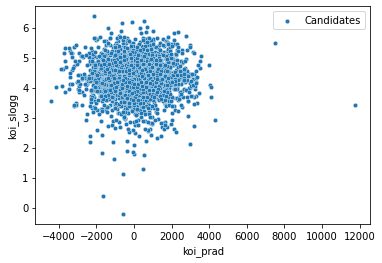

In [21]:
jitter(df[df.koi_disposition == 'CANDIDATE']['koi_prad'], df[df.koi_disposition == 'CANDIDATE']['koi_slogg'], label='Candidates')

### Onlly the false positives

<AxesSubplot:xlabel='koi_prad', ylabel='koi_slogg'>

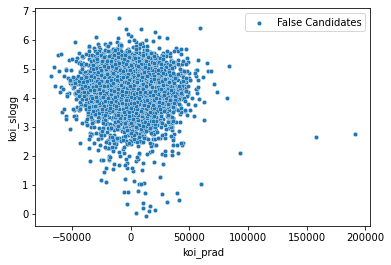

In [22]:
jitter(df[df.koi_disposition == 'FALSE POSITIVE']['koi_prad'], df[df.koi_disposition == 'FALSE POSITIVE']['koi_slogg'], label="False Candidates")

##### objects having the planetary radius of greater than 12500 are mostly false positives

### Orbital periods of the objects

Text(0.5, 0, 'Orbital Period (days)')

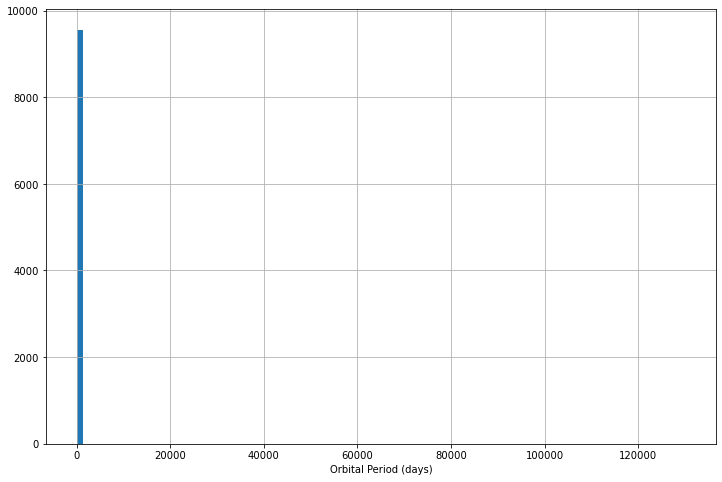

In [23]:
ax = df.koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")

###### Outliers are impacting the plot

#### Plot without the outliers

In [24]:
df.koi_period.head()

0     9.488036
1    54.418383
2    19.899140
3     1.736952
4     2.525592
Name: koi_period, dtype: float64

In [25]:
df.koi_period.max()

129995.7784

In [26]:
df.koi_period.min()

0.241842544

In [27]:
df.koi_period.mean()

75.67135842482405

##### Selecting the entries containing only koi_period ten times the mean and greater 

In [28]:
len(df[df.koi_period<756])

9552

###### That includes 99.8% of the objects

Text(0.5, 1.0, 'All objects')

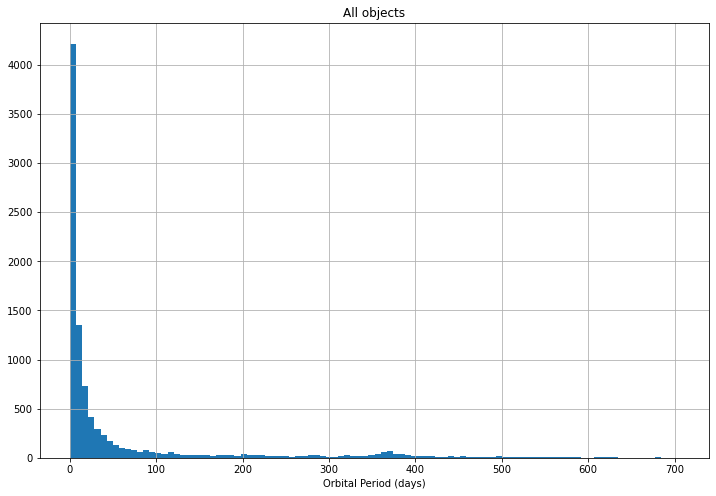

In [29]:
ax = df[df.koi_period<756].koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")
ax.set_title("All objects")

Text(0.5, 1.0, 'Confirmed planets only')

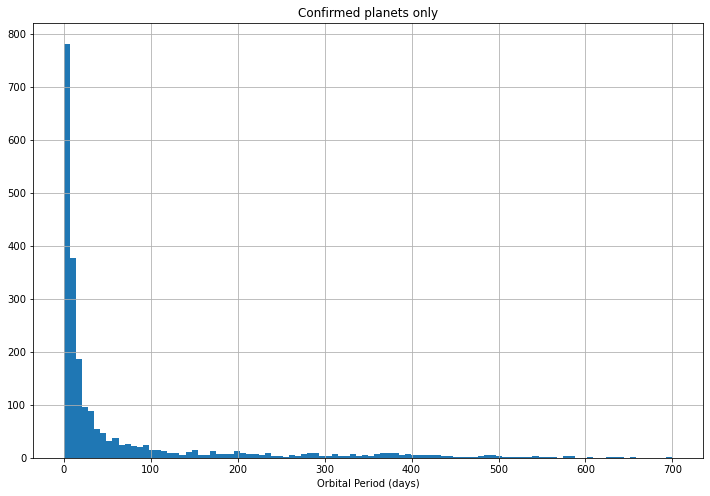

In [30]:
ax = df[df.koi_period<756][df.koi_disposition == 'CANDIDATE'].koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")
ax.set_title("Confirmed planets only")

Text(0.5, 1.0, 'False Positives only')

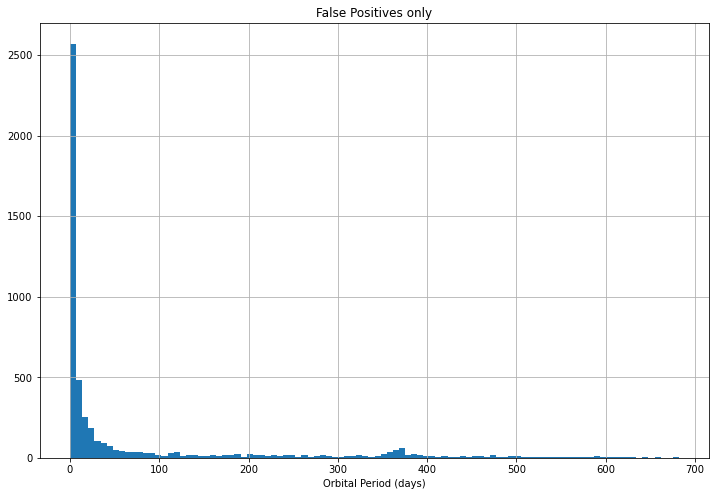

In [31]:
ax = df[df.koi_period<756][df.koi_disposition == 'FALSE POSITIVE'].koi_period.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Orbital Period (days)")
ax.set_title("False Positives only")

### Duration to transit

Text(0.5, 1.0, 'All objects')

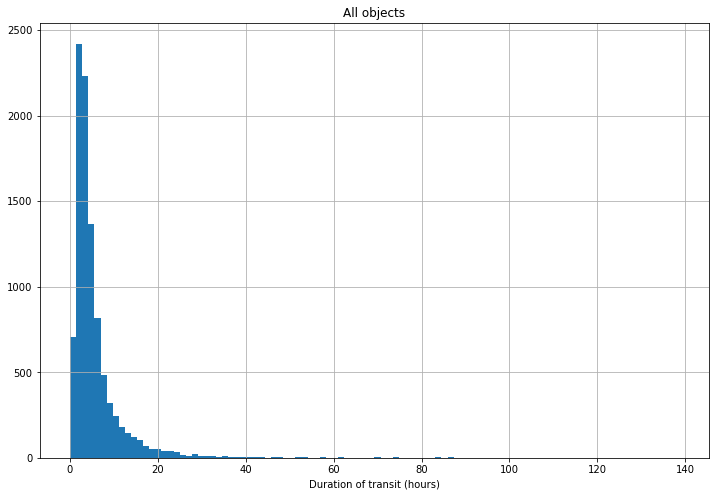

In [32]:
ax = df.koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")
ax.set_title("All objects")

Text(0.5, 1.0, 'Confirmed planets only')

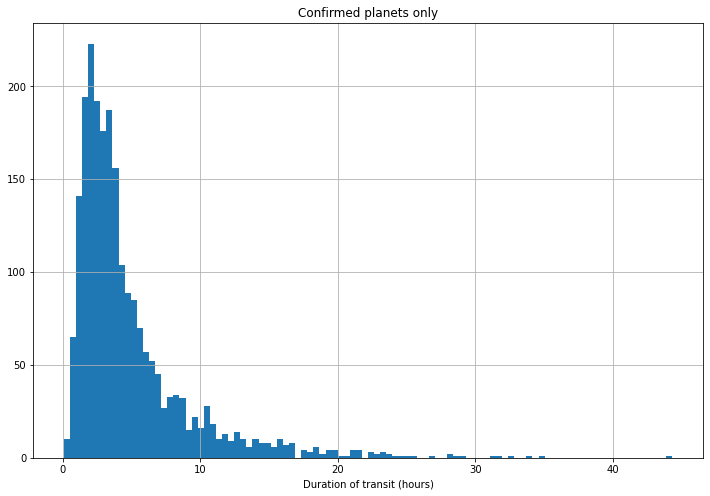

In [33]:
ax = df[df.koi_disposition == 'CANDIDATE'].koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")
ax.set_title("Confirmed planets only")


Text(0.5, 1.0, 'False candidates only')

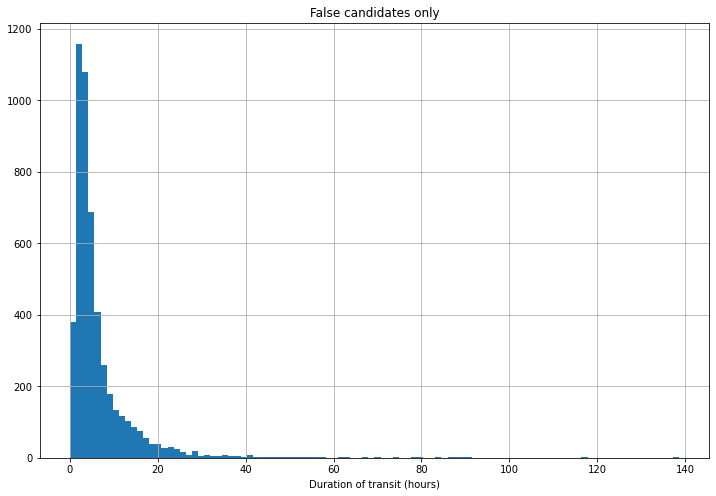

In [34]:
ax = df[df.koi_disposition == 'FALSE POSITIVE'].koi_duration.hist(bins=100, figsize=(12, 8))
ax.set_xlabel("Duration of transit (hours)")
ax.set_title("False candidates only")

### Temperatures of stars and planets

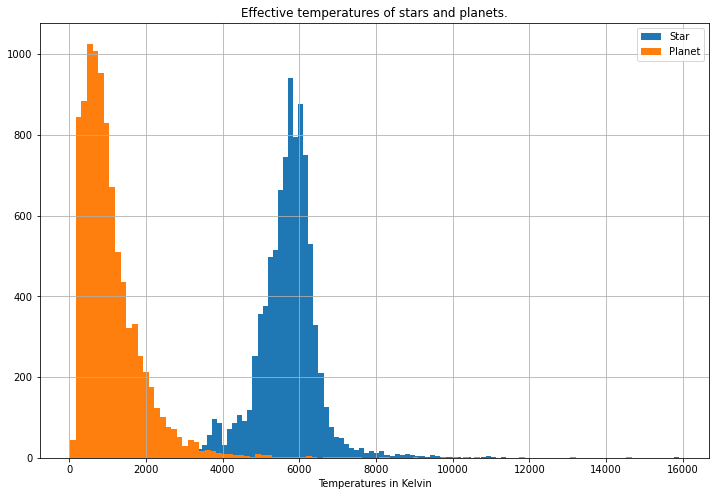

In [35]:
ax = df.koi_steff.hist(bins=100, figsize=(12, 8), label="Star")
ax.set_xlabel("Temperatures in Kelvin")
ax.set_title("Effective temperatures of stars and planets.")

df.koi_teq.hist(ax=ax, bins=100, label='Planet')
ax.legend()

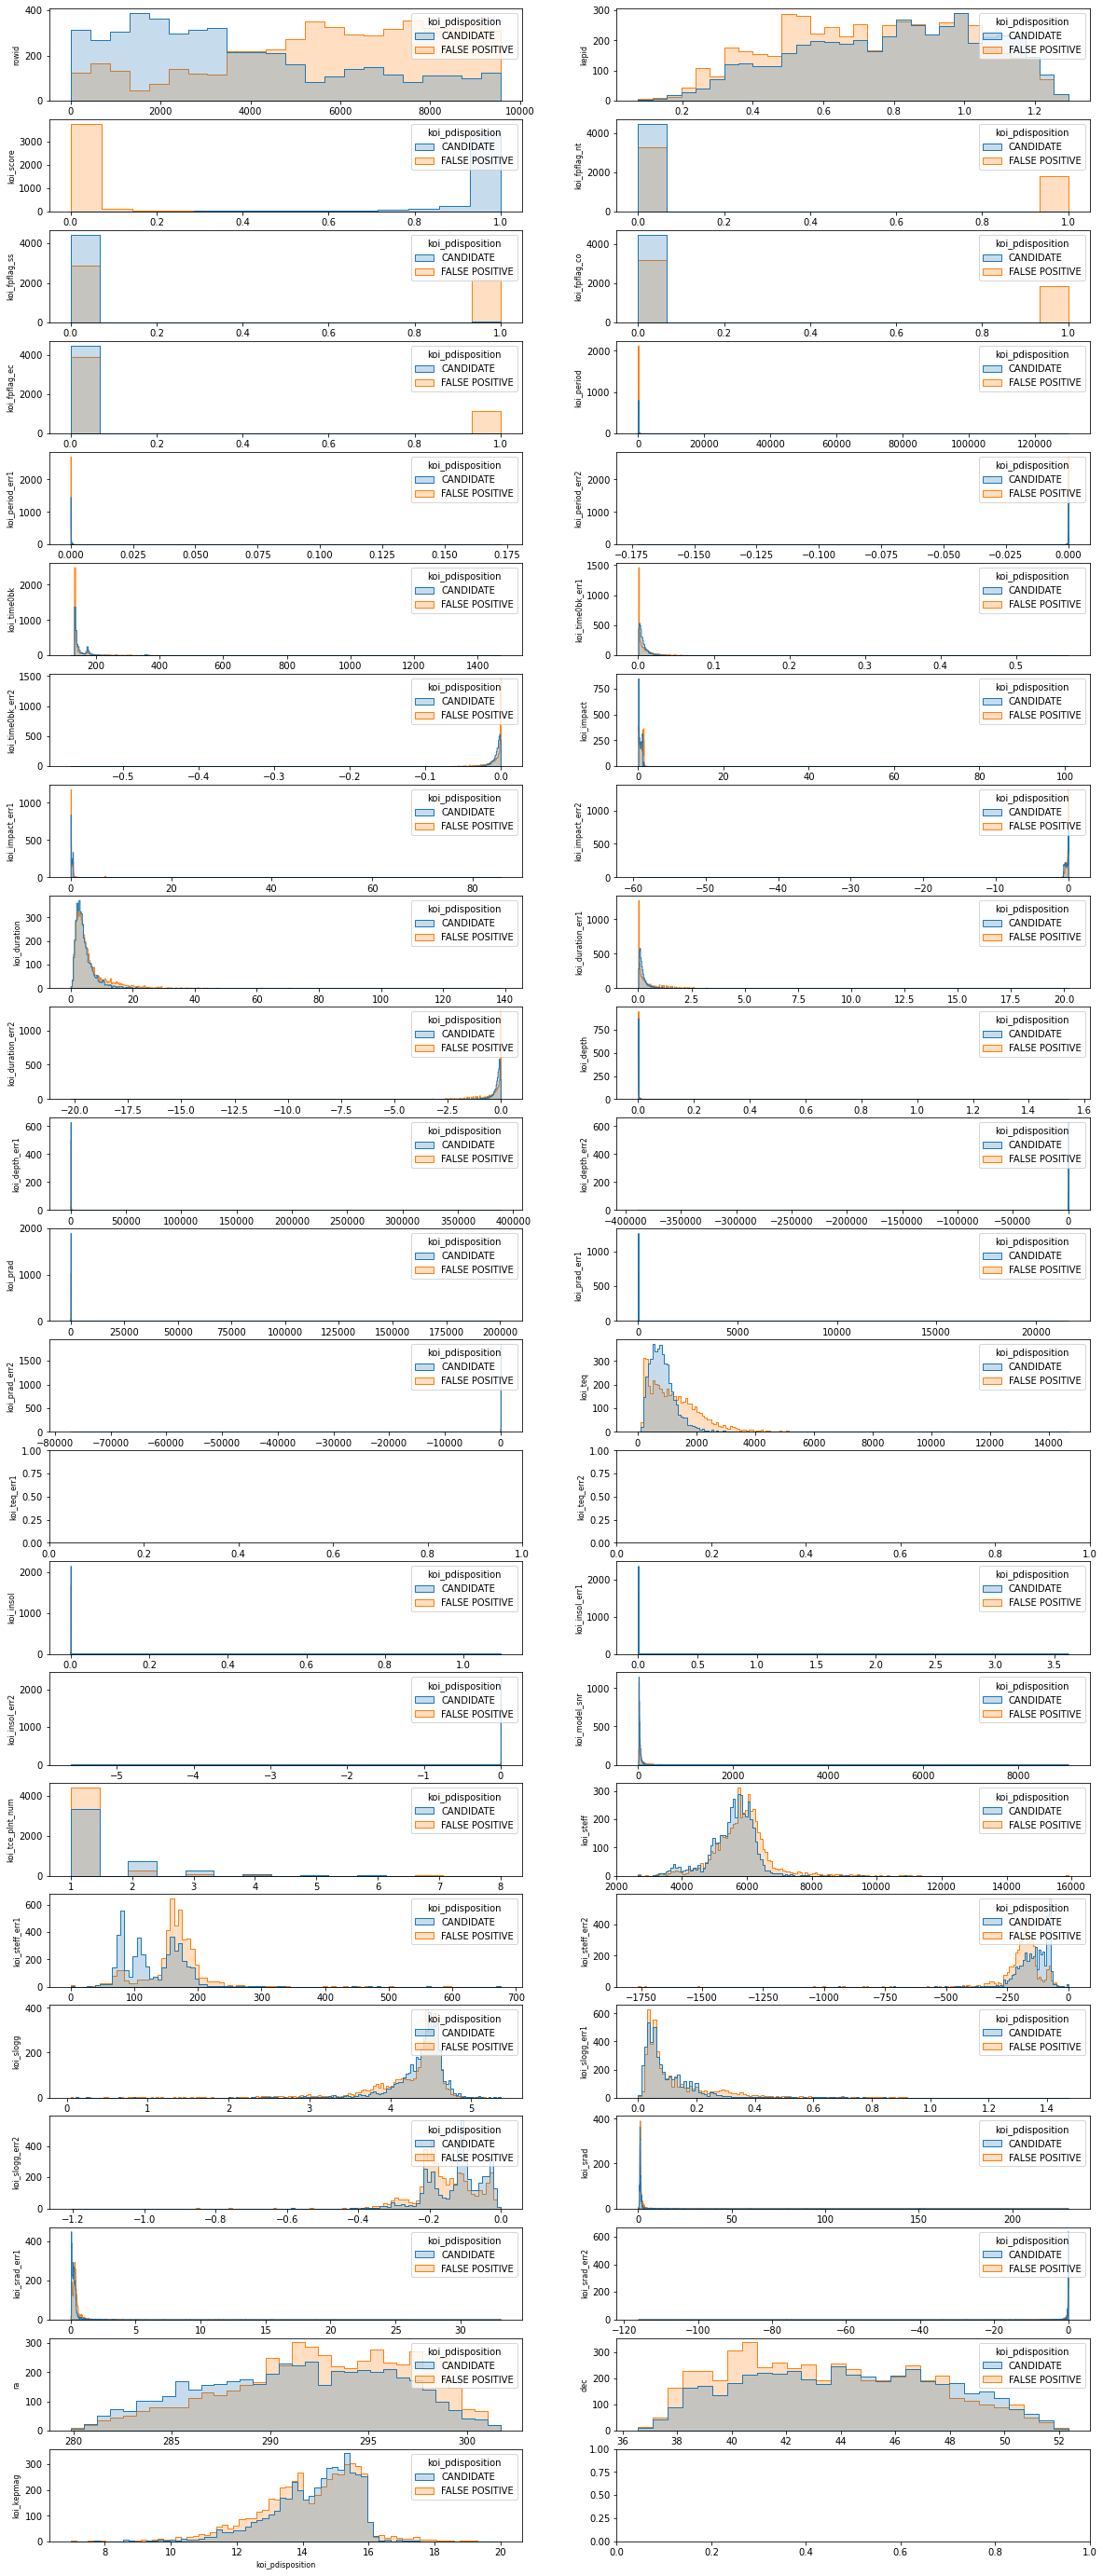

In [36]:
fig, axes = plt.subplots(23, 2, figsize=(20, 50))
index = 0
for i, pred in enumerate(df.select_dtypes(exclude=['object']).columns):
    row = int(i / 2)
    col = int(i % 2)
    b = sns.histplot(df,
                     x=pred,
                     hue='koi_pdisposition',
                     element="step",
                     ax=axes[row, col])
    b.set_xlabel("koi_pdisposition", fontsize=8)
    b.set_ylabel(pred, fontsize=8)
plt.show()

###### reference
###### Plasscijason. (2021, July 28). Kepler_exoplanets_general_characteristics. Kaggle. Retrieved December 5, 2021, from https://www.kaggle.com/

## Preprocessing the data

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

#### Drop unnecessary columns

In [38]:
# rowid,kepid - just ids
# kepoi_name,kepler_name - name of the object - doesn't hold any information for creating the object
# koi_disposition - discard exoplanet archive disposition data - we only keep koi_pdisposition which is kepler data
#koi_teq_err1, koi_teq_err2 have 0 values - drop the columns
#koi_tce_delivname - delivery method, doesn't hold any significance
columns = ['rowid','kepid','kepoi_name', 'kepler_name', 'koi_disposition', 'koi_teq_err1','koi_teq_err2','koi_tce_delivname']
df.drop(columns, axis=1,inplace=True)

#### fill score with the mean

In [39]:
#koi_score - fill with mean
df['koi_score'].fillna(df['koi_score'].mean(),inplace=True)

#### Previous works of others have either completely dropped the uncertainties columns are replaced with mean. Both the solutions are not feasible.
##### Dropping the columns means we are not taking into account the unceratainties. Replacing with means doesn't always mean that the value replaced is correct. There might be bigger mean but in reality lesser value and vice-versa.
###### Previous Works: 
1. Logan. (2021, August 2). Identifying exoplanets using multiple classification models. Medium. Retrieved December 1, 2021, from https://medium.com/@scheidlogan/identifying-exoplanets-using-multiple-classification-models-7ee48024d7fd. 
2. Sturrock, G. C., Manry, B., &amp; Rafiqi, S. (n.d.). Machine Learning Pipeline for Exoplanet Classification. SMU Scholar. Retrieved December 1, 2021, from https://scholar.smu.edu/datasciencereview/vol2/iss1/9/. 

### We propose the idea of using linear regression to find out the values of missing data.

In [40]:
def fill_with_regression(column):
    #koi_period
    uncertain_1 = column+"_err1" #add to the column name for uncertainty column1 #koid_period_err1
    uncertain_2 = column+"_err2" #add to the column name for uncertainty column2
    x = df[df[uncertain_1].isnull()==False][column] #get a copy of a dataset[column] values containing non nulls
    y = df[df[uncertain_1].isnull()==False][uncertain_1] #get a copy of dataset[column_err1] values containing non nulls
    x_test = df[df[uncertain_1].isnull()][column] #get a copy of dataset[column_err1] values containing all nulls
    lr = LinearRegression() 
    lr.fit(x.to_numpy().reshape(-1,1),y.to_numpy().reshape(-1,1)) #fit
    y_test = pd.Series(lr.predict(x_test.to_numpy().reshape(-1,1)).reshape(len(x_test,))) #predict the results
    y_test = y_test.values.tolist()
    fill = pd.DataFrame(index =df.index[df[uncertain_1].isnull()], data= y_test,columns=[uncertain_1])
    #u1_filled = df[uncertain_1].apply(lambda x: y_test if pd.isnull(x) else x) #fill the values.
    #df.drop(uncertain_1, axis=1, inplace=True)
    df[uncertain_1].fillna(fill.squeeze(), inplace=True)
    

    
    # repeat for 2nd uncertain column
    x = None
    y = None
    x_test = None
    y_test = None
    lr = None
    
    
    x = df[df[uncertain_2].isnull()==False][column] #get a copy of a dataset[column] values containing non nulls
    y = df[df[uncertain_2].isnull()==False][uncertain_2] #get a copy of dataset[column_err1] values containing non nulls
    x_test = df[df[uncertain_2].isnull()][column] #get a copy of dataset[column_err1] values containing all nulls
    lr = LinearRegression() 
    lr.fit(x.to_numpy().reshape(-1,1),y.to_numpy().reshape(-1,1)) #fit
    y_test = pd.Series(lr.predict(x_test.to_numpy().reshape(-1,1)).reshape(len(x_test,))) #predict the results
    y_test = y_test.values.tolist()
    fill2 = pd.DataFrame(index =df.index[df[uncertain_2].isnull()], data= y_test,columns=[uncertain_2])
    #u2_filled = df[uncertain_2].apply(lambda x: y_test if pd.isnull(x) else x) #fill the values.
    #df.drop(uncertain_1, axis=1, inplace=True)
    df[uncertain_2].fillna(fill.squeeze(), inplace=True)

In [41]:
need_filling = ['koi_period','koi_time0bk','koi_duration']

In [42]:
for column in need_filling:
    fill_with_regression(column)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   9564 non-null   object 
 1   koi_score          9564 non-null   float64
 2   koi_fpflag_nt      9564 non-null   int64  
 3   koi_fpflag_ss      9564 non-null   int64  
 4   koi_fpflag_co      9564 non-null   int64  
 5   koi_fpflag_ec      9564 non-null   int64  
 6   koi_period         9564 non-null   float64
 7   koi_period_err1    9564 non-null   float64
 8   koi_period_err2    9564 non-null   float64
 9   koi_time0bk        9564 non-null   float64
 10  koi_time0bk_err1   9564 non-null   float64
 11  koi_time0bk_err2   9564 non-null   float64
 12  koi_impact         9201 non-null   float64
 13  koi_impact_err1    9110 non-null   float64
 14  koi_impact_err2    9110 non-null   float64
 15  koi_duration       9564 non-null   float64
 16  koi_duration_err1  9564 

### Fill other columns with the mean and preprocess for the uncertainties

In [44]:
mean_columns = ['koi_impact','koi_duration','koi_depth', 'koi_prad','koi_steff','koi_slogg','koi_srad','koi_kepmag','koi_teq','koi_insol','koi_model_snr','koi_tce_plnt_num']

In [45]:
for i in mean_columns:
    df[i].fillna(df[i].mean(), inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   9564 non-null   object 
 1   koi_score          9564 non-null   float64
 2   koi_fpflag_nt      9564 non-null   int64  
 3   koi_fpflag_ss      9564 non-null   int64  
 4   koi_fpflag_co      9564 non-null   int64  
 5   koi_fpflag_ec      9564 non-null   int64  
 6   koi_period         9564 non-null   float64
 7   koi_period_err1    9564 non-null   float64
 8   koi_period_err2    9564 non-null   float64
 9   koi_time0bk        9564 non-null   float64
 10  koi_time0bk_err1   9564 non-null   float64
 11  koi_time0bk_err2   9564 non-null   float64
 12  koi_impact         9564 non-null   float64
 13  koi_impact_err1    9110 non-null   float64
 14  koi_impact_err2    9110 non-null   float64
 15  koi_duration       9564 non-null   float64
 16  koi_duration_err1  9564 

In [47]:
pre_proc = ['koi_impact','koi_depth', 'koi_prad','koi_insol','koi_steff','koi_slogg','koi_srad']

In [48]:
for i in pre_proc:
    fill_with_regression(i)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_pdisposition   9564 non-null   object 
 1   koi_score          9564 non-null   float64
 2   koi_fpflag_nt      9564 non-null   int64  
 3   koi_fpflag_ss      9564 non-null   int64  
 4   koi_fpflag_co      9564 non-null   int64  
 5   koi_fpflag_ec      9564 non-null   int64  
 6   koi_period         9564 non-null   float64
 7   koi_period_err1    9564 non-null   float64
 8   koi_period_err2    9564 non-null   float64
 9   koi_time0bk        9564 non-null   float64
 10  koi_time0bk_err1   9564 non-null   float64
 11  koi_time0bk_err2   9564 non-null   float64
 12  koi_impact         9564 non-null   float64
 13  koi_impact_err1    9564 non-null   float64
 14  koi_impact_err2    9564 non-null   float64
 15  koi_duration       9564 non-null   float64
 16  koi_duration_err1  9564 

In [50]:
df['koi_steff_err2'].fillna(df['koi_steff_err2'].mean(),inplace=True)

#### Use global X, y, X_train, X_test, y_train, y_test for easy calculations

#### Split the data into train and test sets

In [51]:
def split():
    X = df.drop(columns=['koi_pdisposition'])
    y = y = df.koi_pdisposition
    return train_test_split(X, y, test_size=0.30)

#### Standard scaler to make all values in the dataset even

In [52]:
def scale(X_train,X_test):
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_train = pd.DataFrame(X_train_scaled, index = X_train.index, columns = X_train.columns)
    X_test_scaled = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_scaled, index = X_test.index, columns = X_test.columns)
    return X_train,X_test

#### Logistic Regression

In [53]:
def logReg(X_train,y_train):
    print("Logistic Regression")
    lr = LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred = lr.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("Accuracy Score: ", score)
    print()
    return y_pred

#### Decision Tree Classifier

In [54]:
def decTree(X_train,y_train):
    print("Decision Tree classifier")
    clf = DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print("Accuracy Score: ", score)
    print()
    return y_pred

#### Random Forest Classifier

In [55]:
def randForest(X_train,y_train):
    print("Random Forest")
    rfc = RandomForestClassifier()
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print("Accuracy Score: ", score)
    print()
    return y_pred

#### SVM Classifier

In [56]:
def svmClassifier(X_train,y_train):
    print("SVM")
    svmc = SVC()
    svmc.fit(X_train,y_train)
    y_pred = svmc.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print("Accuracy Score: ", score)
    print()
    return y_pred

#### Confusion Matrix

In [57]:
def ConfusionMatrix(y_test,y_pred):
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    print("True Negative: ",tn)
    print("True Positive: ",tp)
    print("False Negative: ",fn)
    print("False Positive: ",fp)
    print()

In [58]:
X_train,X_test,y_train,y_test = split()
X_train,X_test = scale(X_train,X_test)

y_pred = logReg(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = svmClassifier(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = decTree(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = randForest(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

Logistic Regression
Accuracy Score:  0.9836236933797909

True Negative:  1335
True Positive:  1488
False Negative:  33
False Positive:  14

SVM
Accuracy Score:  0.980836236933798

True Negative:  1322
True Positive:  1493
False Negative:  28
False Positive:  27

Decision Tree classifier
Accuracy Score:  0.9850174216027875

True Negative:  1334
True Positive:  1493
False Negative:  28
False Positive:  15

Random Forest
Accuracy Score:  0.9850174216027875

True Negative:  1323
True Positive:  1504
False Negative:  17
False Positive:  26



#### We also propose the idea of adding new columns to the dataset, to improve the accuracy of the calculations. We have found one opportunity of adding the density column using planetary radius and surface gravity. The calculation for the same is:

##### G=6.67*(10**-11) N m^2/kg^2
##### g=GM/R^2
##### M=4/3*pi*R^3*density
##### g=4/3*pi*G*density*R
##### density = 3/4*g/(R*pi*G)

###### This idea of adding new column is novel and no other works so far have done this

In [59]:
df['density'] = ((3/4)*df['koi_slogg'])/(df['koi_prad']*3.14*(6.67*(10**-11)))

In [60]:
X_train,X_test,y_train,y_test = split()
X_train,X_test = scale(X_train,X_test)

y_pred = logReg(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = svmClassifier(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = decTree(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

y_pred = randForest(X_train,y_train)
ConfusionMatrix(y_test,y_pred)

Logistic Regression
Accuracy Score:  0.9878048780487805

True Negative:  1342
True Positive:  1493
False Negative:  24
False Positive:  11

SVM
Accuracy Score:  0.9850174216027875

True Negative:  1327
True Positive:  1500
False Negative:  17
False Positive:  26

Decision Tree classifier
Accuracy Score:  0.9864111498257839

True Negative:  1335
True Positive:  1496
False Negative:  21
False Positive:  18

Random Forest
Accuracy Score:  0.9874564459930314

True Negative:  1327
True Positive:  1507
False Negative:  10
False Positive:  26



## Conclusions:
###### These conclusions are solely based on the understanding of the work done by us and the review of works done by others
### Dataset:
Dataset consisted of 9564 entries spawning over 50 columns.
In those 50 columns, there were 8 columns that held no significance. Hence we dropped the following columns:
1. rowid,
2. kepid - just ids
3. kepoi_name,
4. kepler_name - name of the object - doesn't hold any information for creating the object
5. koi_disposition - discard exoplanet archive disposition data - we only keep koi_pdisposition which is kepler data
6. koi_teq_err1, 
7. koi_teq_err2 have 0 values - drop the columns
8. koi_tce_delivname - delivery method, doesn't hold any significance
We have continued without these 8 columns.
- We have split the data into train and test sets with the test size being 30% of the dataset

### False Positive Flags:
Based on the exploratory data analysis and visualization we have performed, we have noted the following flags:
1. Apparent Magnitude - Objects containing >18 Apparent Magnitude turned out to be false positives.
2. Orbital Period - Objects having orbital period > 550 had koi_score < 0.5 meaning less likely to be a planet.
3. Surface Gravity - Most objects having surface gravity > 13000 turned out to be false positives

### Results:
We have tried to produce the models resulting in best possible accuracy.
1. Our approach of filling uncertainties with linear regression have helped to create the best possible models. 2. This approach has resulted in accuracies that weren't produced earlier. (Others have achieved around 85% accuracy in their models - Links to other's work was mentioned in the notebook above)
3. The approach of creating the model by adding one more column has increased the accuracy in all the models.

### Further Improvements:
- Within the given timeline, we were only able to research well into this topic and come with one column, future works could benefit from the work we have already done and research what other columns could be added to the dataset.
- We have filled the missing values of few columns with their mean - researching on what other ways could the missing values be filled helps in increasing the accuracy